In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfbs

In [2]:
eos = pyfbs.PyEoStable("/media/data/Documents/PhD/B09/B09/EOS_tables/eos_HS_DD2_with_electrons.beta")

In [3]:
myFBS = pyfbs.PyFermionBosonStar(eos, 1.)
myFBS.set_initial_conditions(0.0005, 1e-5)
myFBS.bisection(1., 10., max_step=200)
myFBS.evaluate_model()
myFBS.get()

{'M_T': 0.3480544143847415,
 'N_B': 7.4145620141837684e-09,
 'N_F': 0.028025734215970464,
 'R_B': 16.790000000099827,
 'R_F': 6.920000000099897,
 'R_F_0': 9.290000000099846,
 'rho_0': 0.0005,
 'phi_0': 1e-05}

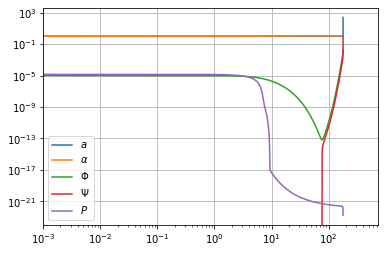

In [4]:
ax = plt.gca()
myFBS.plot(ax)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim(left=1e-3)
ax.legend(); ax.grid()